In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/gene_expression.csv')

In [3]:
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


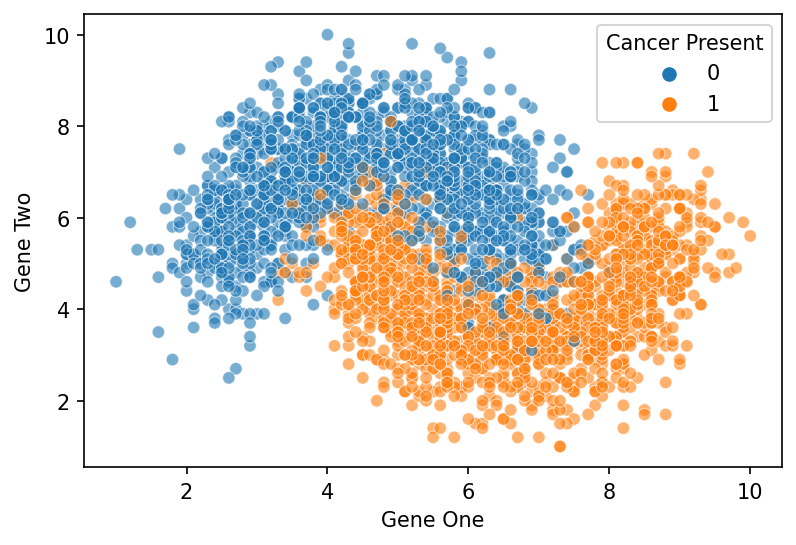

In [9]:
plt.figure(dpi=150)
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.6);

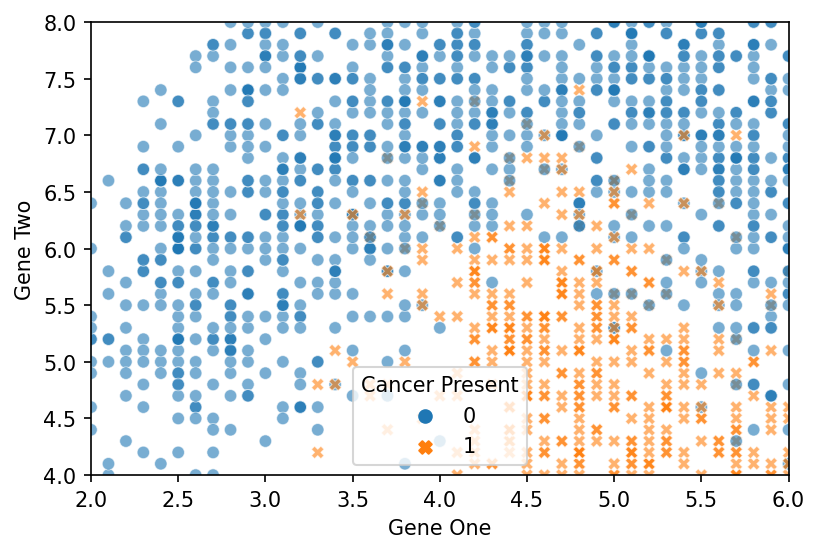

In [11]:
plt.figure(dpi=150)
sns.scatterplot(data=df, 
                x='Gene One', 
                y='Gene Two', 
                hue='Cancer Present', 
                alpha=0.6,
                style='Cancer Present')
plt.xlim(2,6)
plt.ylim(4,8);

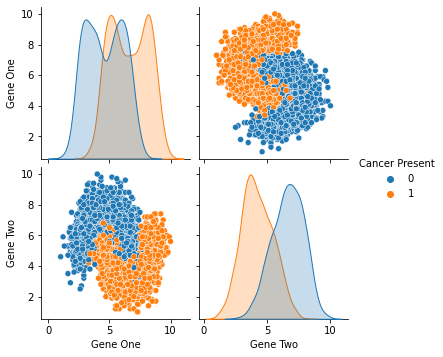

In [13]:
sns.pairplot(data=df, hue='Cancer Present')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn_model = KNeighborsClassifier(n_neighbors=19)

knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [43]:
y_pred = knn_model.predict(scaled_X_test)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [46]:
confusion_matrix(y_test,y_pred)

array([[448,  22],
       [ 25, 405]], dtype=int64)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       470
           1       0.95      0.94      0.95       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



In [40]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = np.round(1 - accuracy_score(y_test,y_pred_test), 2)
    
    test_error_rates.append(test_error)
    

print(test_error_rates)

[0.1, 0.1, 0.07, 0.08, 0.07, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06]


Text(0.5, 0, 'K Neighbors')

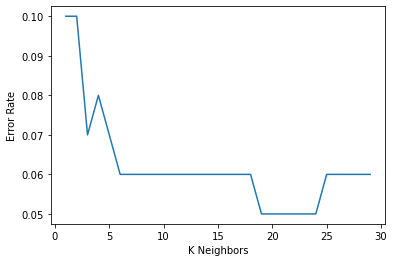

In [41]:
plt.plot(range(1,30), test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')

In [48]:
scaler = StandardScaler()

knn = KNeighborsClassifier()

knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [49]:
operations = [('scaler', scaler), ('knn', knn)]

In [50]:
from sklearn.pipeline import Pipeline

In [51]:
pipe = Pipeline(operations)

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
k_values = list(range(1,20))

In [55]:
param_grid = {
    'knn__n_neighbors':k_values
}

In [56]:
full_cv_classifier = GridSearchCV(pipe, 
                                  param_grid, 
                                  cv=5, 
                                  scoring='accuracy')

In [57]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [58]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [60]:
y_pred = full_cv_classifier.predict(X_test)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [63]:
new_patient = [[3.8,6.4]]

In [64]:
full_cv_classifier.predict(new_patient)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [72]:
full_cv_classifier.predict_proba(new_patient)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1., 0.]])